In [26]:
# https://www.madopro.net/entry/pytorch_mnist

import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST

# データ・セットをダウンロード
mnist_data = MNIST('./mnist', train=True, download=True, 
                   transform=transforms.ToTensor())

data_loader = DataLoader(mnist_data, batch_size=4, shuffle=False)



torch.Size([1, 28, 28])


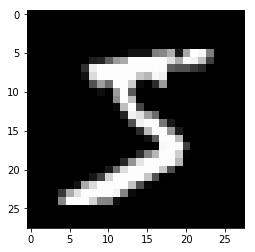

In [24]:
import matplotlib.pyplot as plt
data_iter = iter(data_loader)
images, labels = data_iter.next()

# 可視化
print(images[0].shape)
npimg = images[0].numpy()
npimg = npimg.reshape((28,28))
plt.imshow(npimg, cmap='gray')
plt.show()

In [49]:
train_data = MNIST('./mnist', train=True, download=True, transform=transforms.ToTensor())
train_loader = DataLoader(mnist_data, batch_size=4,shuffle=True)
test_data = MNIST('./mnist', train=False, download=True, transform=transforms.ToTensor())
test_loader = DataLoader(test_data, batch_size=4, shuffle=False)

In [50]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(28 * 28, 50) # 入力層から隠れ層
        self.l2 = nn.Linear(50, 10) # 隠れ層から出力層へ
        
    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.l1(x)
        x = self.l2(x)
        return x

net = Net()

In [51]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)


In [52]:
for epoch in range(3):
    running_loss = 0.0
    for i, data in enumerate(train_loader):
        inputs, labels = data
        # 勾配情報のリセット
        optimizer.zero_grad()
        # 順伝播
        outputs=net(inputs)
        # ロスの計算
        loss = criterion(outputs, labels)
        # 逆伝播
        loss.backward()
        # パラメータの更新
        optimizer.step()
        
        running_loss += loss.data[0]
        
        if i % 5000 ==4999:
            print('{} {} loss: {}.'.format(epoch+1, i+1, running_loss/1000))
            running_loss = 0.0
        
print('Finished training')

/Users/yukisunami/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  app.launch_new_instance()


1 5000 loss: 2.7153236865997314.
1 10000 loss: 1.7291462421417236.
1 15000 loss: 1.6040823459625244.
2 5000 loss: 1.5170072317123413.
2 10000 loss: 1.5583170652389526.
2 15000 loss: 1.4944294691085815.
3 5000 loss: 1.4648092985153198.
3 10000 loss: 1.4467204809188843.
3 15000 loss: 1.4713599681854248.
Finished training


In [58]:
import torch
correct = 0
total = 0
for data in test_loader:
    inputs, labels = data
    outputs = net(inputs)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()
    
print('Accuracy {}/{} = {}'.format(correct, total, correct.item() / total))

Accuracy 9225/10000 = 0.9225


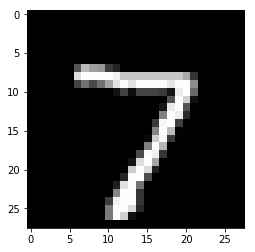

Label:  tensor(7)


In [62]:
test_iter = iter(test_loader)
inputs, labels = test_iter.next()
outputs = net(inputs)
_, predicted = torch.max(outputs.data, 1)
plt.imshow(inputs[0].numpy().reshape(28,28), cmap='gray')
plt.show()
print('Label: ', predicted[0])